# Visualization

Plot your data in a meaningful way


## Step 1: Import the cleaned data

In [2]:
import pandas as pd
import numpy as np

In [3]:
data2 = pd.read_csv('DataChallenge_cleanedData.csv')

In [4]:
data2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain or snow,sun
0,28.0,5.0,26,21.5,12.0,E10,0,0,0
1,12.0,4.2,30,21.5,13.0,E10,0,0,0
2,11.2,5.5,38,21.5,15.0,E10,0,0,0
3,12.9,3.9,36,21.5,14.0,E10,0,0,0
4,18.5,4.5,46,21.5,15.0,E10,0,0,0


## Step 2: Boxplot (Check for Outliers)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

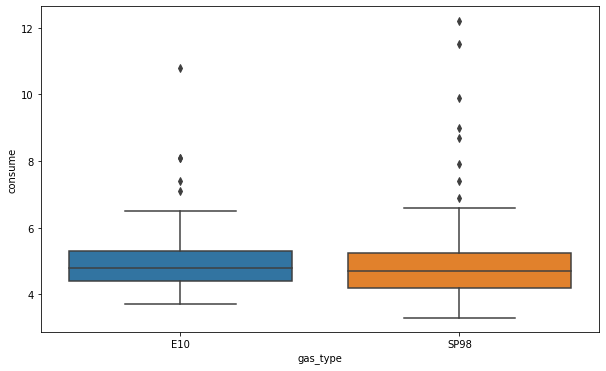

In [6]:
# Boxplot consume and gas_type:
plt.rcParams["figure.figsize"] = (10,6)
sns.boxplot(x="gas_type", y="consume", data=data2)
plt.show()

In [ ]:
# SP98 has more outliers to the top then E10 - but all in all, the consume is not so much different.

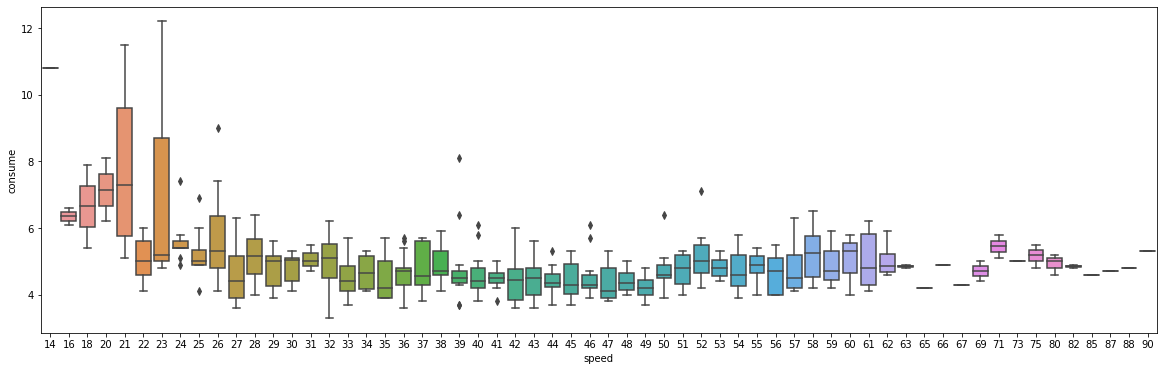

In [10]:
# Boxplot speed and consume:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="speed", y="consume", data=data2)
plt.show()

In [ ]:
# Interestingly, the consume in the lower speed range seems higher, then drops until ca. 50, then slowly rises (bit hardly)

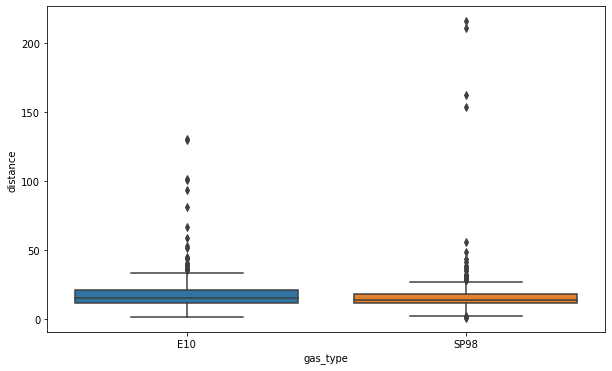

In [11]:
# Boxplot distance and gas_type:
plt.rcParams["figure.figsize"] = (10,6)
sns.boxplot(x="gas_type", y="distance", data=data2)
plt.show()

In [ ]:
# SP98 shows a more outliers in long distance, but all in all it seems to get used more in the smaller distance rides
# (even though the number of SP98 drives are higher then E10)

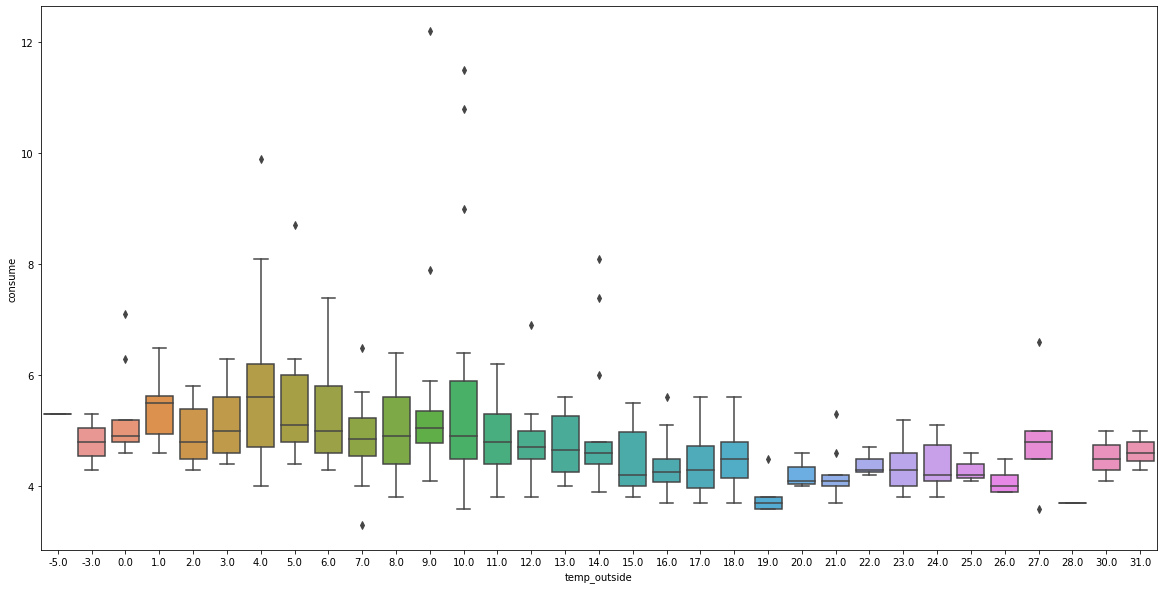

In [17]:
# Boxplot temp_outside and comsume:
plt.rcParams["figure.figsize"] = (20,10)
sns.boxplot(x="temp_outside", y="consume", data=data2)
plt.show()

In [ ]:
# Most consume is in lower temperatures (-5 till 10), then it goes down until around 23 - from there is a slow rise.

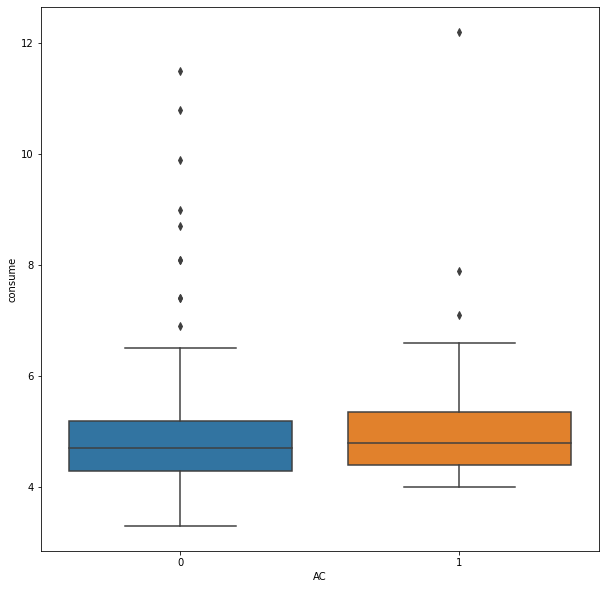

In [15]:
# Boxplot AC and comsume:
plt.rcParams["figure.figsize"] = (10,10)
sns.boxplot(x="AC", y="consume", data=data2)
plt.show()

In [ ]:
# Consume is with AC slightly higher, but the consume without AC has more outliers

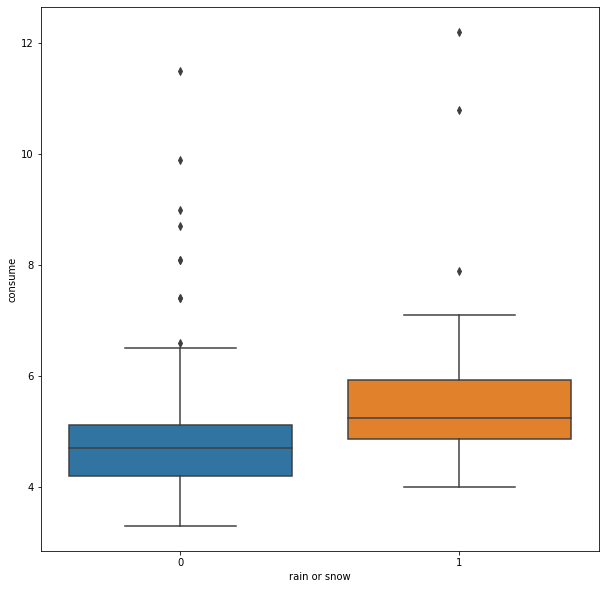

In [18]:
# Boxplot rain or snow and comsume:
plt.rcParams["figure.figsize"] = (10,10)
sns.boxplot(x="rain or snow", y="consume", data=data2)
plt.show()

In [ ]:
# There is more consume in rain or snow 
# - I have to check if this is depending on the number of rides in rain or snow are maybe higher:

In [20]:
data2['rain or snow'].value_counts(dropna=False)

0    340
1     48
Name: rain or snow, dtype: int64

In [ ]:
# the number of rides in rain or snow is lower.

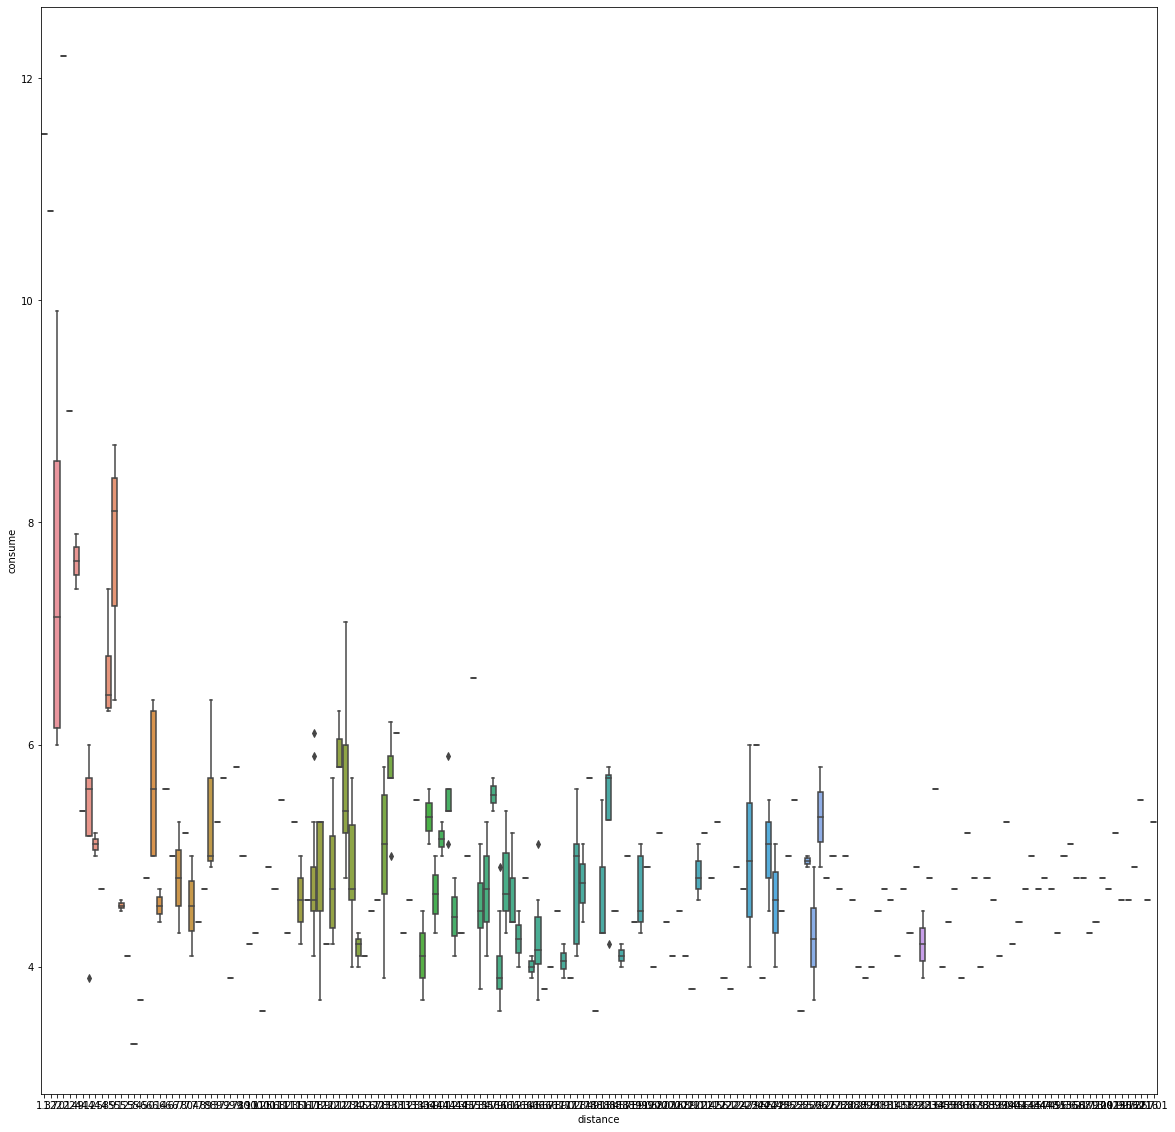

In [24]:
# Boxplot distance and consume:
plt.rcParams["figure.figsize"] = (20,20)
sns.boxplot(x="distance", y="consume", data=data2)
plt.show()

In [ ]:
# Consume is higher in short distance rides (re-check!)

## Step 3: Histplot

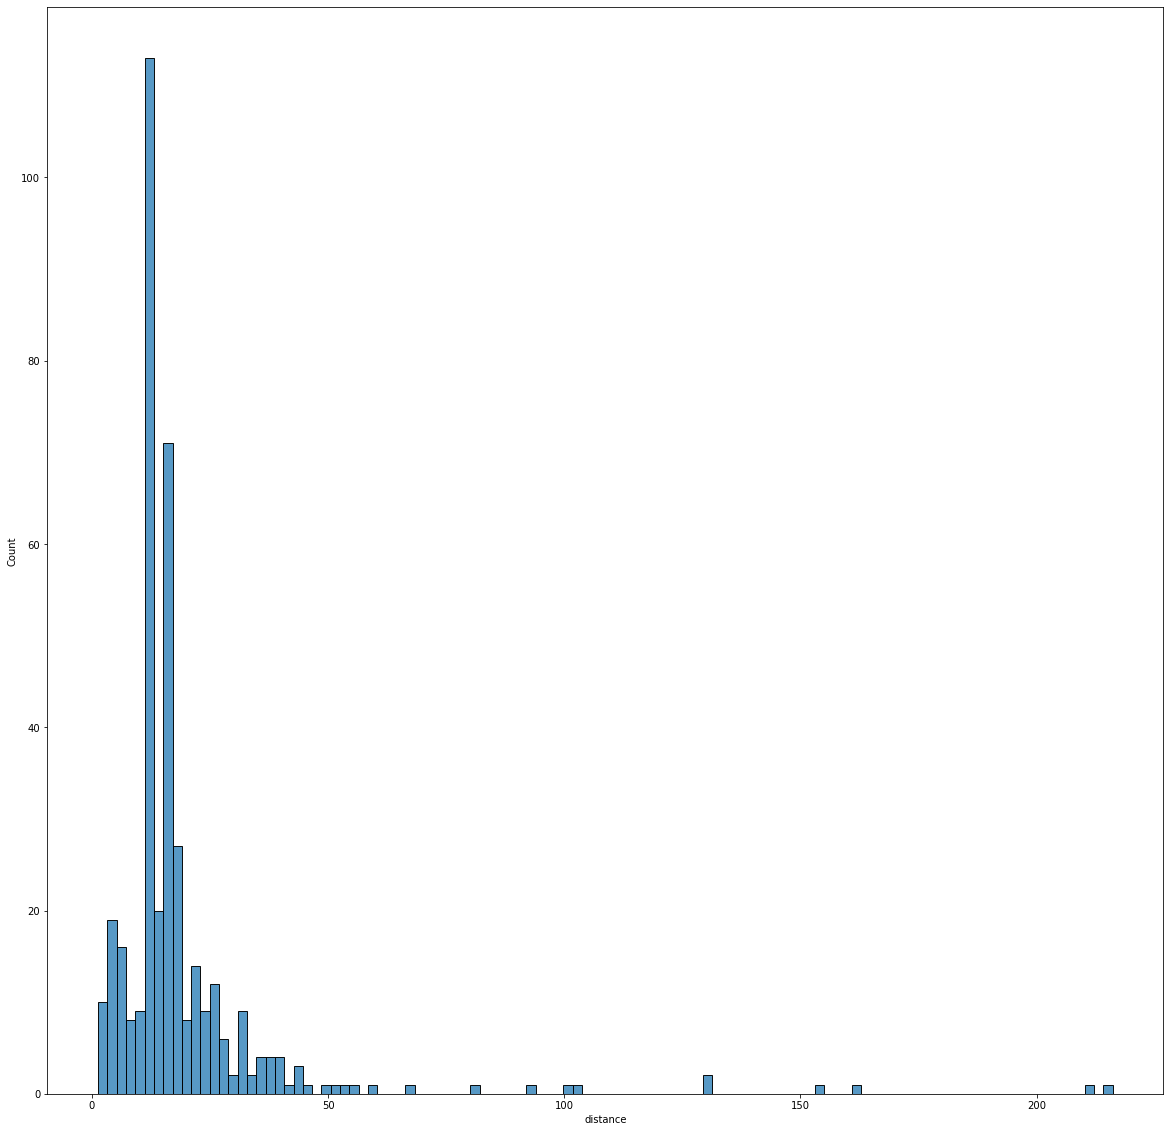

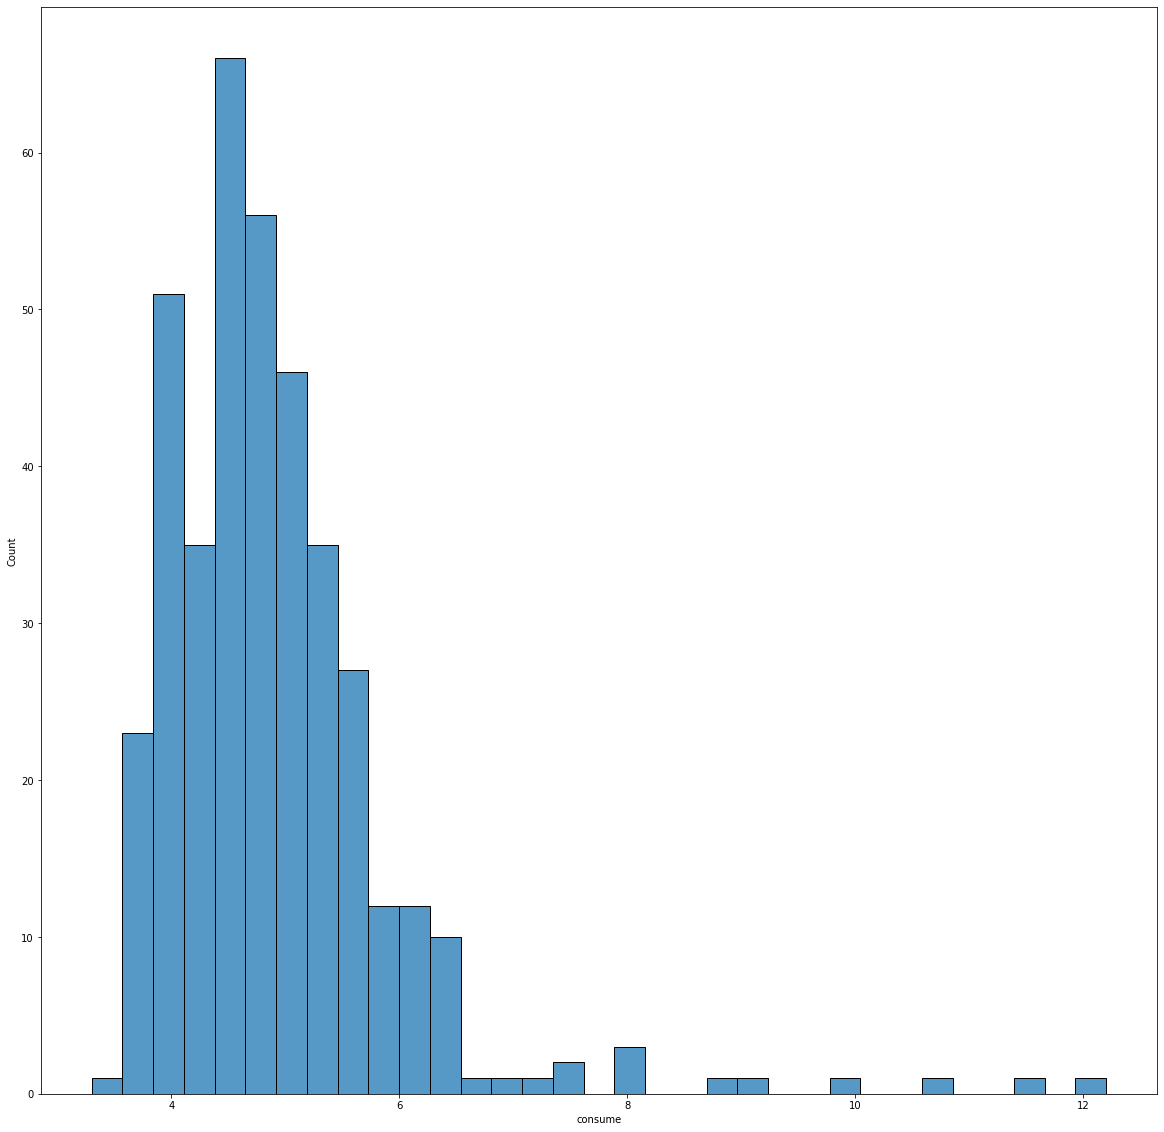

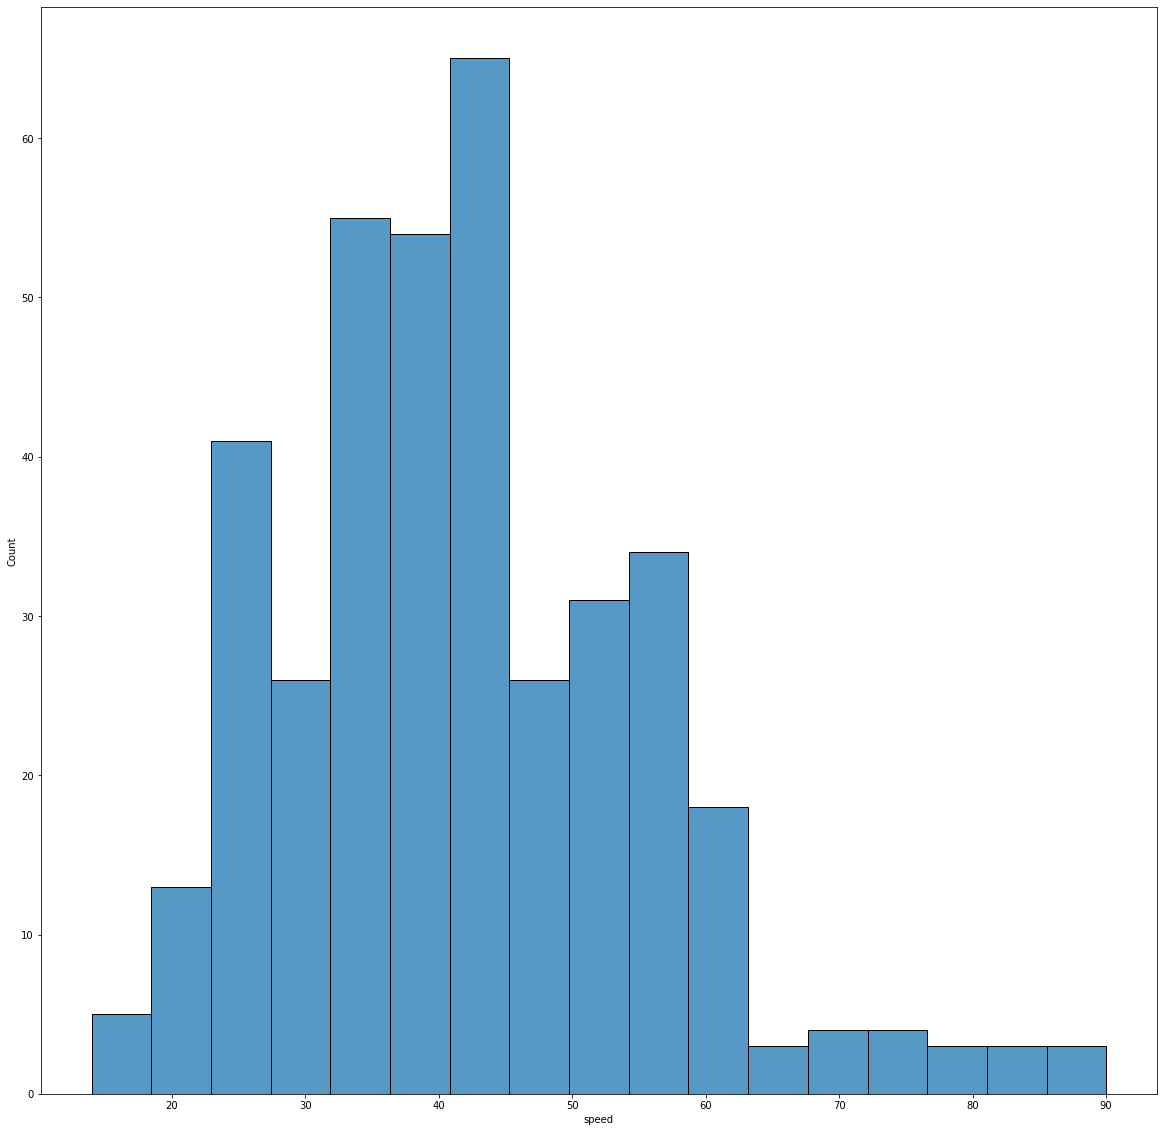

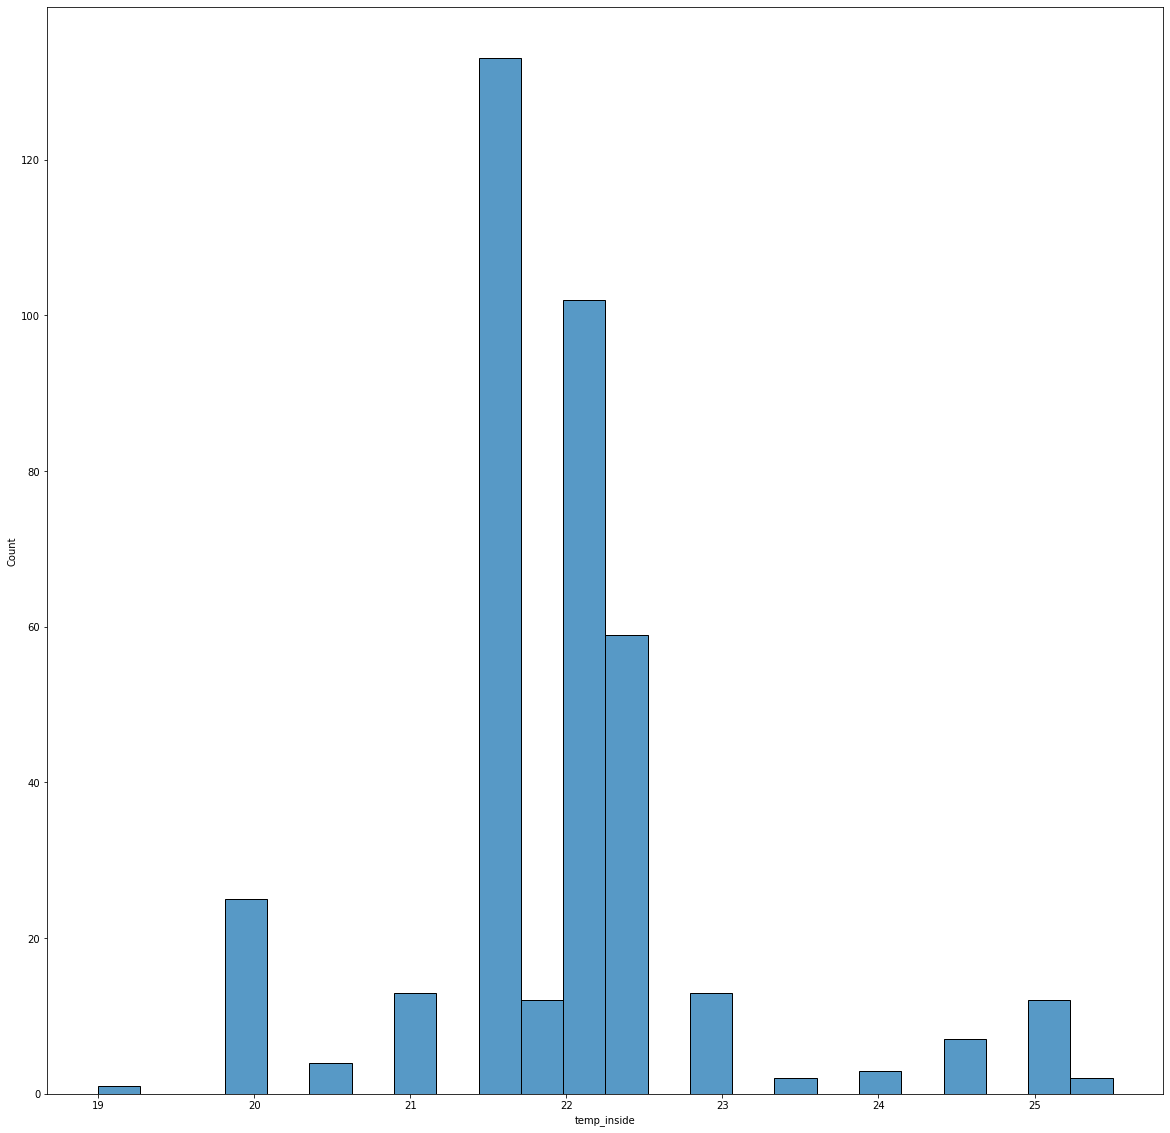

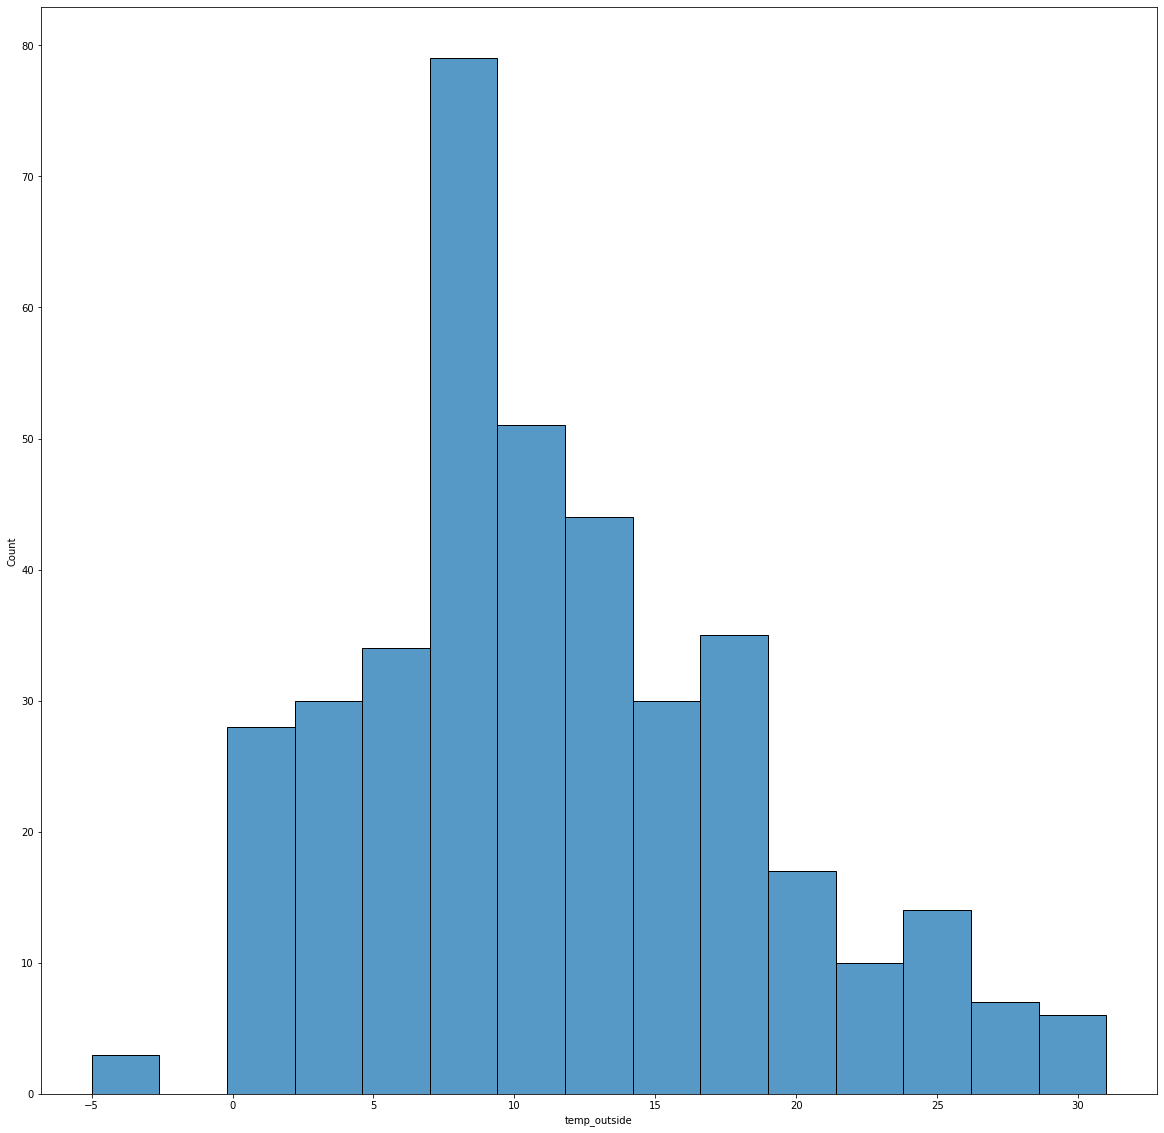

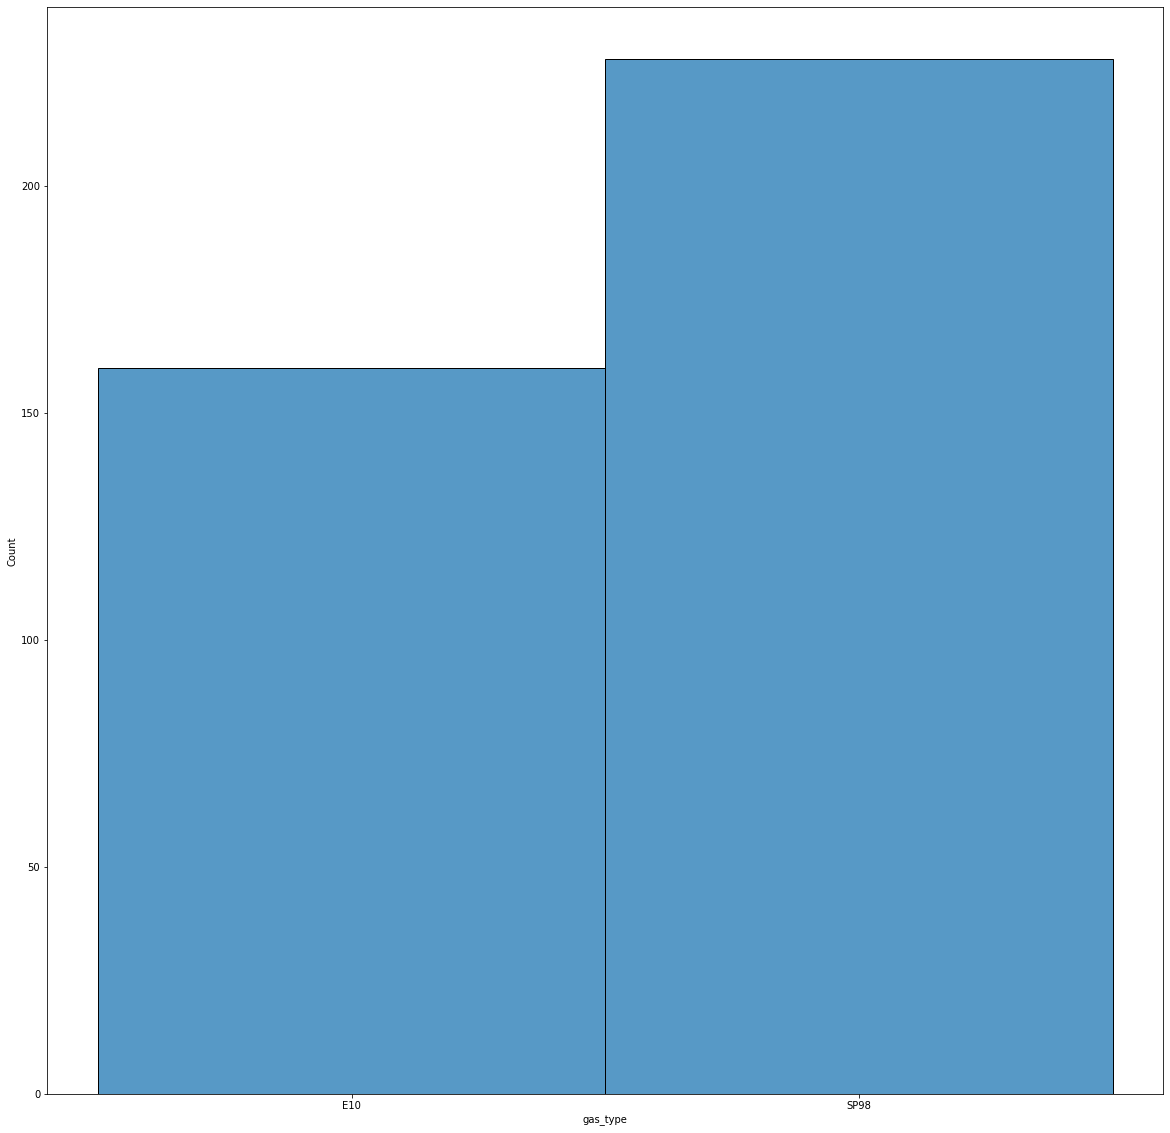

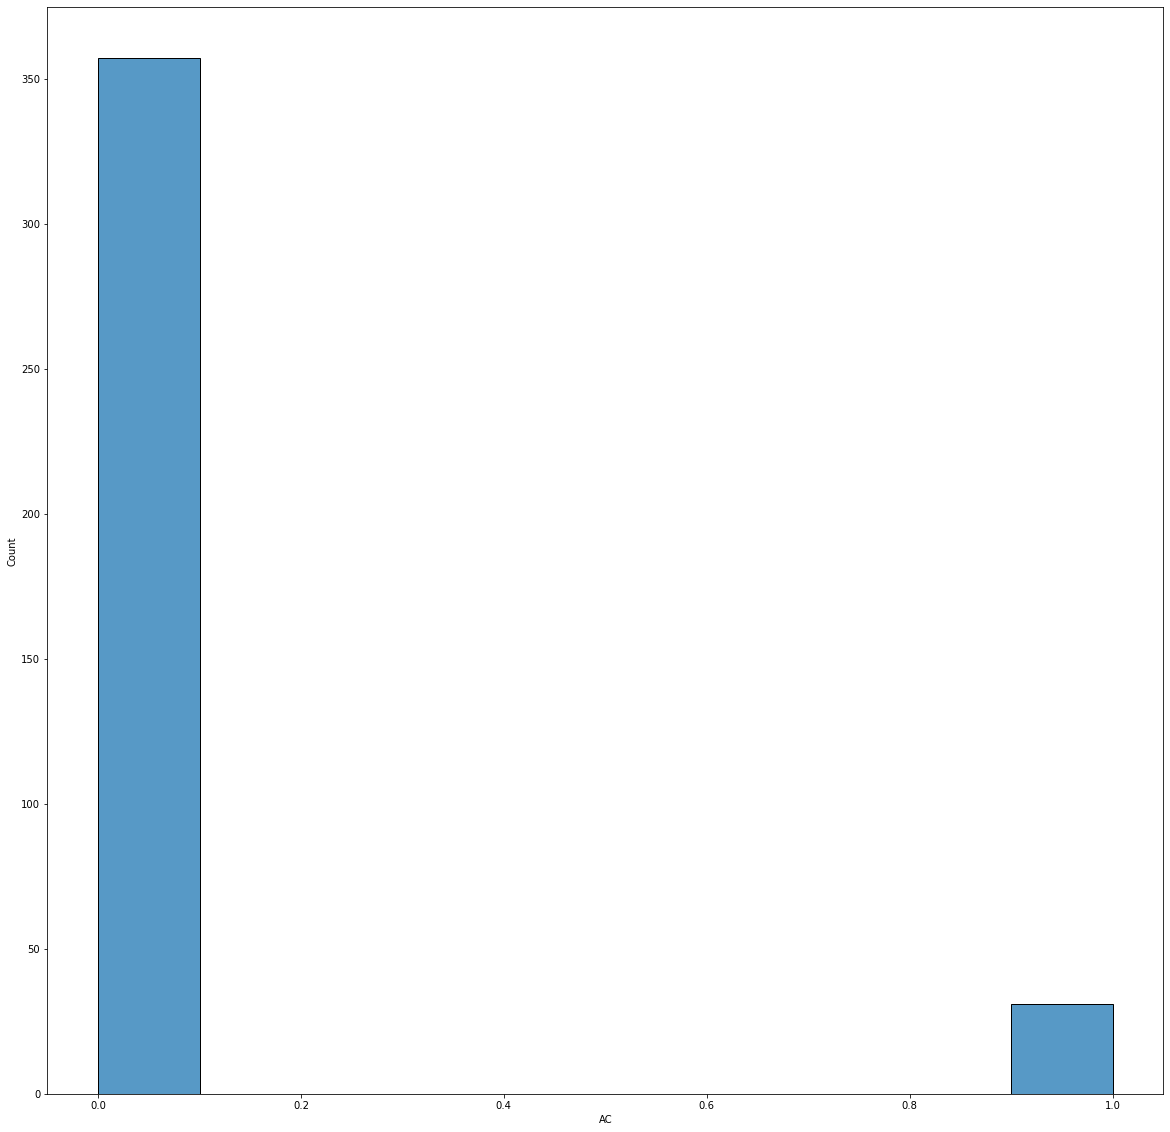

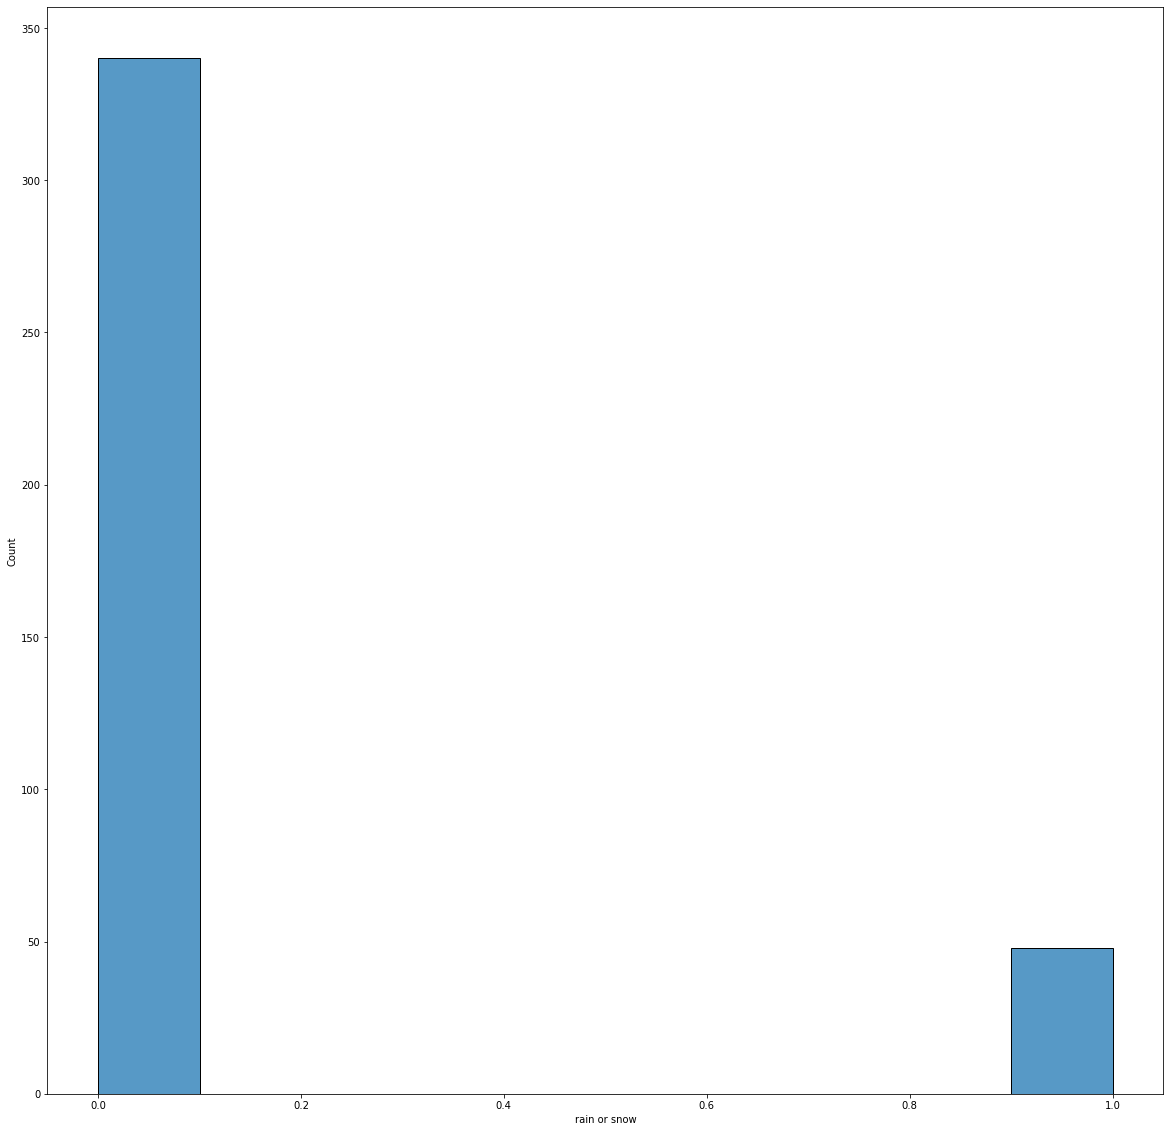

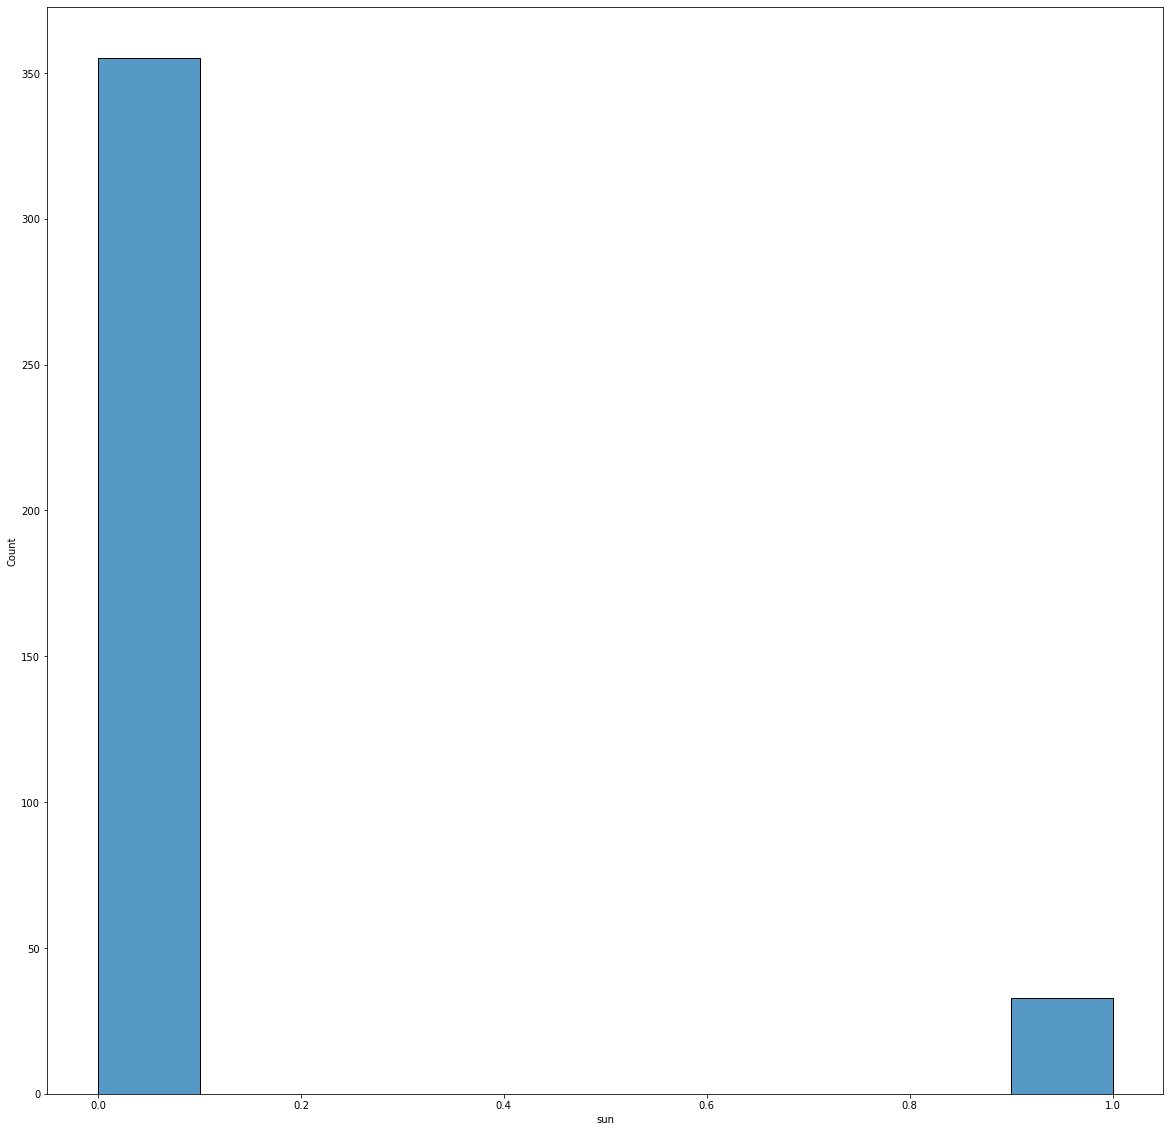

In [26]:
def histplot(df):
    for column in data2:
        plt.figure(figsize=(20,20))
        sns.histplot(data2[column])
        plt.show()
histplot(data2)

In [ ]:
# distance: way more short distance rides
# consume: mostly between 4 and 6 liters / 100 km
# speed: mostly between 20-60 km/h on average
# temp_inside: around 22 degrees, with a range between 19 and 26 
# temp_outside: mostliy around 8 - but range is between -5 and over 30 degrees
# gas_type: Way more SP98 then E10
# AC: way more no AC rides then with AC
# rain or snow: way less rainy/snowy rides than non-rainy/snowy
# sun: not many sunny rides

## Step 4: Pivot Table

In [27]:
# gas_type and speed:

data2.pivot_table(index= ['gas_type'],columns=['speed'])

AC                                                     ...  \
speed      14   16   18   20    21   22   23   24        25   26  ...   
gas_type                                                          ...   
E10       0.0  0.0  NaN  0.0  0.00  0.0  0.0  0.0  0.000000  0.0  ...   
SP98      NaN  1.0  1.0  0.0  0.25  0.0  0.5  0.0  0.111111  0.0  ...   

         temp_outside                                                     
speed              69   71    73   75    80   82    85    87    88    90  
gas_type                                                                  
E10              13.0  2.0  12.0  9.0   5.0  NaN  12.0  22.0  18.0   NaN  
SP98              8.0  8.0   NaN  1.0  20.0  8.0   NaN   NaN   NaN  21.0  

[2 rows x 420 columns]

In [28]:
# gas_type and consume:

data2.pivot_table(index= ['consume'],columns=['gas_type'])

AC             distance            rain or snow            \
gas_type       E10      SP98        E10       SP98          E10      SP98   
consume                                                                     
3.3            NaN  0.000000        NaN   5.400000          NaN  0.000000   
3.6            NaN  0.000000        NaN  17.525000          NaN  0.000000   
3.7       0.000000  0.000000  16.300000  14.816667     0.000000  0.000000   
3.8       0.000000  0.000000  16.833333  17.380000     0.000000  0.000000   
3.9       0.000000  0.000000  15.383333  22.150000     0.000000  0.000000   
4.0       0.166667  0.181818  16.683333  23.100000     0.166667  0.000000   
4.1       0.000000  0.062500  17.775000  17.293750     0.000000  0.000000   
4.2       0.000000  0.111111  18.850000  14.255556     0.166667  0.111111   
4.3       0.000000  0.076923  20.700000  17.846154     0.142857  0.076923   
4.4       0.000000  0.375000  27.266667  16.050000     0.000000  0.125000   
4.5       0.000000  0.105263  17.837500  15.642105     0.000000  0.052632   
4.6       0.100000  0.083333  40.690000  32.791667     0.100000  0.166667   
4.7       0.000000  0.090909  28.940000  19.827273     0.000000  0.090909   
4.8       0.142857  0.000000  29.878571  25.700000     0.000000  0.200000   
4.9       0.000000  0.000000  19.050000  28.241667     0.000000  0.166667   
5.0       0.153846  0.214286  20.269231  13.200000     0.076923  0.142857   
5.1       0.142857  0.000000  21.542857  15.683333     0.142857  0.416667   
5.2       0.000000  0.000000  29.485714  12.560000     0.142857  0.000000   
5.3       0.000000  0.125000  18.616667  38.175000     0.333333  0.125000   
5.4       0.000000  0.166667  10.833333  13.566667     0.333333  0.166667   
5.5       0.000000  0.000000  18.266667  66.933333     0.000000  0.000000   
5.6       0.000000  0.000000  13.300000  11.620000     0.000000  0.000000   
5.7       0.000000  0.200000  14.833333  13.300000     0.333333  0.400000   
5.8       0.000000  0.200000  15.350000  14.660000     0.500000  0.200000   
5.9       0.000000  1.000000  12.950000  11.800000     0.000000  1.000000   
6.0       0.000000  0.000000   2.000000  16.866667     0.000000  0.666667   
6.1       0.000000  0.000000  12.050000  12.700000     0.500000  1.000000   
6.2            NaN  0.000000        NaN   9.900000          NaN  0.250000   
6.3       0.000000  0.000000   6.100000   7.333333     0.000000  0.333333   
6.4       0.000000  0.000000   6.600000   5.600000     0.000000  0.000000   
6.5       0.000000  0.000000  12.300000   4.900000     0.000000  0.000000   
6.6            NaN  1.000000        NaN  15.300000          NaN  0.000000   
6.9            NaN  0.000000        NaN   4.900000          NaN  1.000000   
7.1       1.000000       NaN  12.300000        NaN     1.000000       NaN   
7.4       0.000000  0.000000   4.900000   2.900000     0.000000  0.000000   
7.9            NaN  1.000000        NaN   2.900000          NaN  1.000000   
8.1       0.000000       NaN   3.550000        NaN     0.000000       NaN   
8.7            NaN  0.000000        NaN   5.100000          NaN  0.000000   
9.0            NaN  0.000000        NaN   2.400000          NaN  0.000000   
9.9            NaN  0.000000        NaN   2.000000          NaN  0.000000   
10.8      0.000000       NaN   1.700000        NaN     1.000000       NaN   
11.5           NaN  0.000000        NaN   1.300000          NaN  0.000000   
12.2           NaN  1.000000        NaN   2.100000          NaN  1.000000   

              speed                  sun           temp_inside             \
gas_type        E10       SP98       E10      SP98         E10       SP98   
consume                                                                     
3.3             NaN  32.000000       NaN  0.000000         NaN  21.500000   
3.6             NaN  37.000000       NaN  0.250000         NaN  21.000000   
3.7       47.000000  36.833333  0.000000  0.333333   22.000000  23.416667   
3.8       4